# <center> Current Research in Data Science
# <center> Interpretable Machine Learning: Bank Campaign 
## <center> Hypothesis 1 & 5 

**Task 1**:

 What are the most important features and how much do they contribute to the success rate?

**Task 5**:

How can the bank managers strategise campaign features to get maximum success?


**To Do**:

1. Adapt Shapley value, SHAP feat imp, SHAP summary plot
2. Adapt SHAP individual prediction, Clustering SHAP values, Global Surrogate
3. Adapt SHAP dependency plot, SHAP interaction value

**Load Data and Model**

In [2]:
%load_ext autoreload

import sys
sys.path.insert(0, "../src")

import os
os.chdir("../src")

import csv
import joblib
import pandas as pd
from utils import load_data, DataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [ ]:
# x_train, x_test, y_train, y_test  = load_data()
dataGenerator = DataGenerator('data/imputed_bank_data_mice.csv', True, False)
x_train, x_test, y_train, y_test  = dataGenerator.load_data()
x_train_hpo, x_val_hpo, y_train_hpo, y_val_hpo = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

In [22]:
with open('../results/IML/LGBM/model.pkl', 'rb') as file:
    lgbm = joblib.load(file)

In [3]:
with open('../results/retrain_best_svm_with_prob/SVR/model.pkl', 'rb') as file:
    svr = joblib.load(file)

### For our first issue, we will try to answer a few questions regarding the predictive process of our model as given below with the corresponding methodology mentioned.

##### • What are the individual contributions made by a feature of interest when making a successful/unsuccessful deposit to occur?
- [Shapley value, SHAP feat. imp, SHAP summary plot]
1. What is the effect of client information on prediction?
2. How influential are socio-economic indicators on an average client’s ability to make a successful
deposit?
3. How does month or day of week influence success rate?

##### • Which features are the most important for making a successful/unsuccessful deposit to occur?
- [SHAP individual prediction, Clustering SHAP values, Global Surrogate]
1. Which client information are important for making a deposit?
2. Which campaign strategies are most influential for success?
3. Does year end or fiscal year end have an impact on success rate?
4. Are social status and stability relevant?

### To tackle the Fifth issue we will try to answer some questions as given below with the corresponding methodology mentioned.

##### • Does selective targeting maximize conversion rate? - [SHAP dependency plot]
1. Should managers target certain job holders to maximize success?
2. Should managers target people with house loans?
3. Were less educated people less keen to make a deposit?
4. How many days after an unsuccessful campaign should the bank approach a person again? (pdays)
#### • Should managers change campaign strategy based on certain economic factors (interaction between campaign strategy and socio-economic indicators)? - [SHAP interaction value]
1. Should managers decrease campaign effort if euribor3m is high? (Euribor is the average interest rates at which a large panel of European banks borrow funds from one another.)
2. Should managers increase campaign effort if CIP is low? (The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care.)
3. Should managers increase campaigns when CCI is low? (The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation.)
##### • Should managers take different campaign strategies with different groups of individuals (interaction between campaign information and client data)? - [SHAP interaction value]
1. Should banks call job holders less frequently? (pdays, campaign)

In [471]:
# !pip install shap
import sklearn
import shap
# print the JS visualization code to the notebook
shap.initjs()

# LGBM

In [123]:
explainer = shap.TreeExplainer(lgbm)

In [44]:
shap_values = explainer.shap_values(x_test)
file_path0 = '../results/Methods/LGBM/shap_values.pkl'
with open(file_path0, 'rb') as f:
     svm_shap_values2 = pickle.load(f)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap_interaction_values = explainer.shap_interaction_values(x_test)
file_path0 = '../results/Methods/LGBM/shap_interaction_values.pkl'
with open(file_path0, 'rb') as f:
     shap_interaction_values = pickle.load(f)

# Handle One Hot Encoding

In [152]:
num_features = ["age", "campaign", "previous", "emp.var.rate", "cons.price.idx", 
                "cons.conf.idx", "euribor3m", "nr.employed"]
cat_features = list(set(list(x_test)) - set(num_features))
len(cat_features), len(num_features)

(44, 8)

In [155]:
list(x_test).index("age")

0

In [367]:
sorted(list(x_test))

['age',
 'binned_duration_200_400',
 'binned_duration_400_800',
 'binned_duration_less_than_200',
 'binned_duration_more_than_800',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'education_basic',
 'education_highschool',
 'education_illiterate',
 'education_professionalcourse',
 'education_universitydegree',
 'emp.var.rate',
 'euribor3m',
 'housing_yes',
 'job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'nr.employed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous']

In [168]:
list(x_test)[10].split('_')[0]

'job'

In [200]:
index_dict = {}
for column in list(x_test):
    key = column.split('_')[0]
    if key in index_dict:
        index_dict[key].append(list(x_test).index(column))
    else:
        index_dict[key] = [list(x_test).index(column)]
index_dict

{'age': [0],
 'campaign': [1],
 'previous': [2],
 'emp.var.rate': [3],
 'cons.price.idx': [4],
 'cons.conf.idx': [5],
 'euribor3m': [6],
 'nr.employed': [7],
 'job': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 'marital': [19, 20, 21],
 'education': [22, 23, 24, 25, 26],
 'month': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
 'day': [37, 38, 39, 40, 41],
 'poutcome': [42, 43, 44],
 'binned': [45, 46, 47, 48],
 'housing': [49],
 'loan': [50],
 'contact': [51]}

In [296]:
cat_index_list = []
for column in cat_features:
    key = column.split('_')[0]
    cat_index_list.append(key)
cat_index_list = set(cat_index_list)
cat_index_list

{'binned',
 'contact',
 'day',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome'}

In [212]:
a = np.array([[1,2,3,4], [2,3,4,5]])
a.transpose()

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

In [450]:
individual_shap_dict = {}
total_shap_dict = {}
feature = {}
shap_temp = shap_values[1]
# shap_temp = shap_temp.transpose(1,0)
shap_temp.shape, type(shap_temp)
for key, value in index_dict.items():
    total_shap_dict[key] = shap_temp[:,value].sum()
    individual_shap_dict[key] = shap_temp[:,value].sum(axis=1)
    feature[key] = x_test[[x_test.columns[i] for i in value]]

In [451]:
new_shap_values = np.array(list(individual_shap_dict.values())).transpose()
new_shap_values.shape

(8153, 18)

In [452]:
a = cat_index_list - set(['housing', 'loan', 'contact'])
list(a)

['binned', 'day', 'job', 'month', 'education', 'poutcome', 'marital']

In [453]:
for key in feature.keys():
    if key in list(a):
        feature[key] = feature[key].idxmax(axis=1)

In [454]:
for key in feature.keys():
    if not key in cat_index_list:
        feature[key] = feature[key][key]

In [456]:
for key, key2 in zip(['housing', 'loan', 'contact'], ['housing_yes', 'loan_yes', 'contact_telephone']):
    feature[key] = feature[key][key2]

In [457]:
feature = pd.DataFrame.from_dict(feature)

In [459]:
feature

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,month,day,poutcome,binned,housing,loan,contact
8644,0.475750,1.254185,-0.348902,0.764894,0.901229,-0.326438,0.762596,0.846147,job_management,marital_married,education_highschool,month_jun,day_of_week_wed,poutcome_nonexistent,binned_duration_less_than_200,1,0,1
17972,-0.963629,1.254185,-0.348902,0.764894,0.901229,-0.538920,0.762596,0.846147,job_blue-collar,marital_single,education_highschool,month_jul,day_of_week_tue,poutcome_nonexistent,binned_duration_less_than_200,1,0,0
9182,-0.963629,-0.202034,-0.348902,0.764894,0.901229,-0.326438,0.762596,0.846147,job_services,marital_divorced,education_highschool,month_jun,day_of_week_fri,poutcome_nonexistent,binned_duration_less_than_200,1,0,1
9483,-0.867671,-0.566089,-0.348902,0.764894,0.901229,-0.326438,0.762596,0.846147,job_blue-collar,marital_married,education_basic,month_jun,day_of_week_mon,poutcome_nonexistent,binned_duration_200_400,1,1,1
23089,1.243418,3.074458,-0.348902,0.764894,-0.798243,0.948453,0.762596,0.846147,job_admin,marital_married,education_universitydegree,month_aug,day_of_week_tue,poutcome_nonexistent,binned_duration_less_than_200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39632,-1.539381,-0.202034,3.689788,-1.263598,0.901229,0.098526,-1.421427,-2.183080,job_student,marital_single,education_highschool,month_may,day_of_week_tue,poutcome_failure,binned_duration_less_than_200,1,0,0
2831,0.955543,-0.202034,-0.348902,0.764894,0.901229,0.948453,0.762596,0.334360,job_technician,marital_married,education_professionalcourse,month_may,day_of_week_wed,poutcome_nonexistent,binned_duration_400_800,1,0,1
32171,0.955543,1.254185,-0.348902,-1.263598,-0.798243,-1.176365,-1.421427,-0.938193,job_blue-collar,marital_married,education_basic,month_may,day_of_week_fri,poutcome_nonexistent,binned_duration_less_than_200,0,0,0
15140,0.859584,-0.566089,-0.348902,0.764894,0.901229,-0.538920,0.762596,0.846147,job_admin,marital_married,education_highschool,month_jul,day_of_week_thu,poutcome_nonexistent,binned_duration_less_than_200,1,0,0


## SHAP

In [475]:
shap.force_plot(explainer.expected_value[0], new_shap_values[500,:], list(individual_shap_dict.keys()))

In [461]:
shap.force_plot(explainer.expected_value, new_shap_values[:1000,:], list(individual_shap_dict.keys()))

## Feture importance

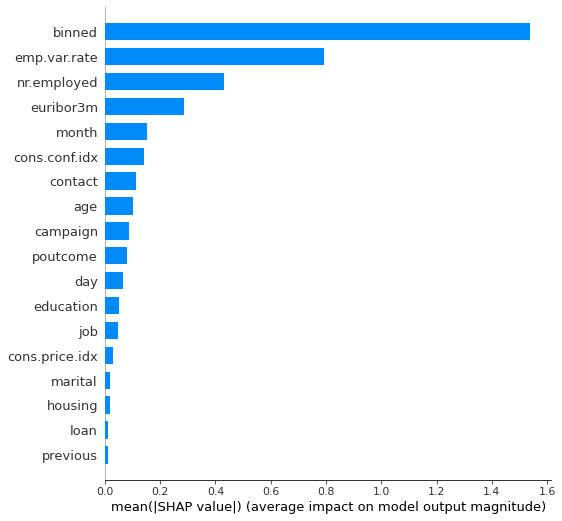

In [462]:
shap.summary_plot(new_shap_values, list(individual_shap_dict.keys()), plot_type="bar",max_display =18)

## Summary Plot

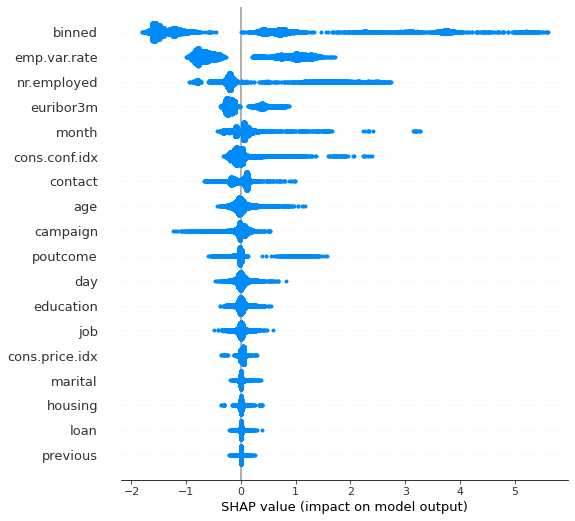

In [463]:
shap.summary_plot(new_shap_values, list(individual_shap_dict.keys()))

## SHAP Dependency Plots

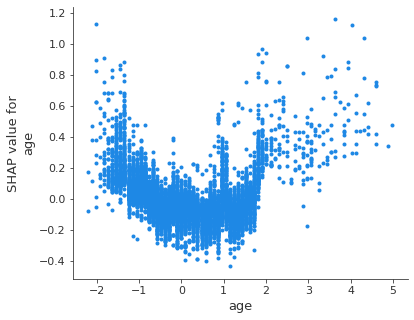

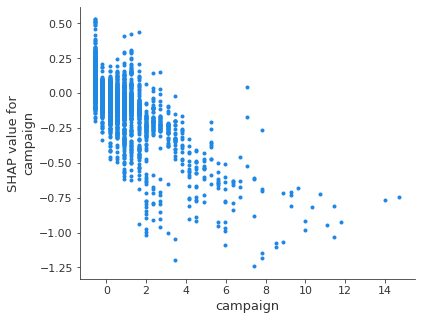

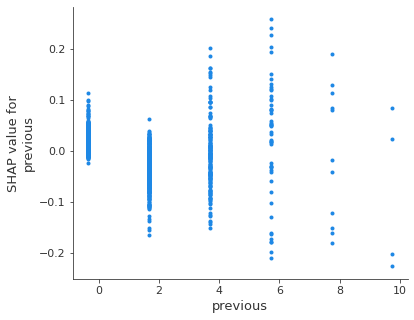

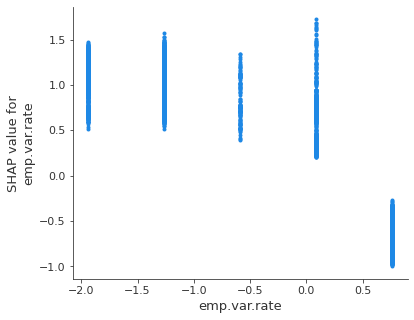

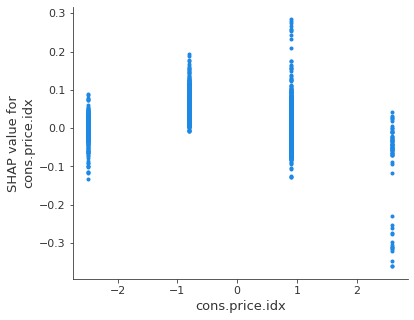

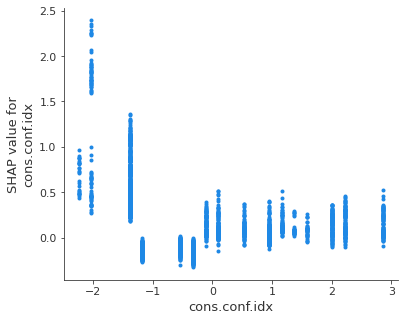

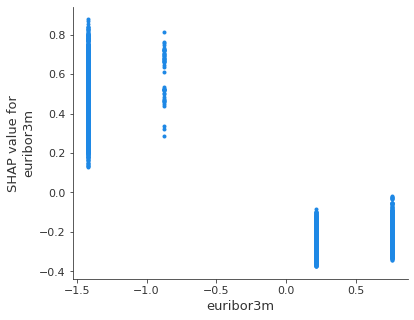

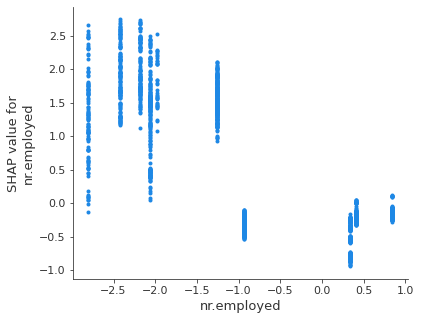

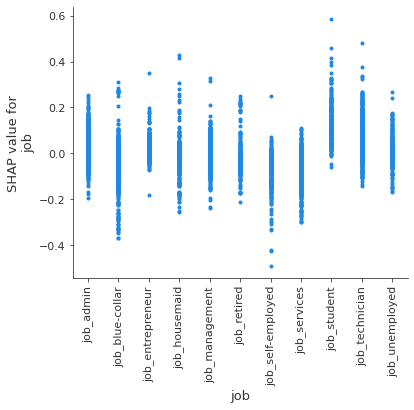

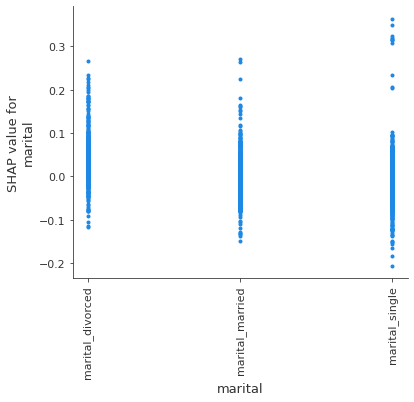

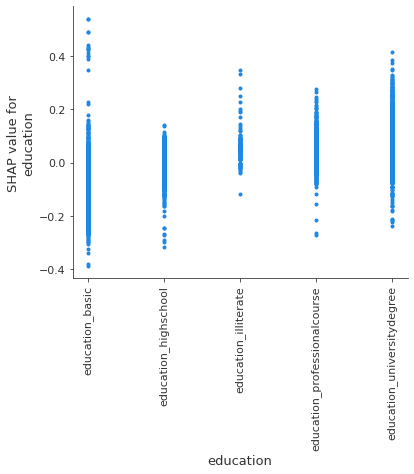

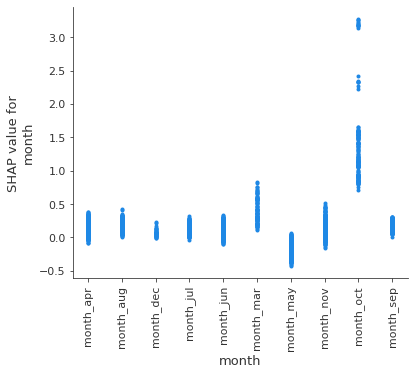

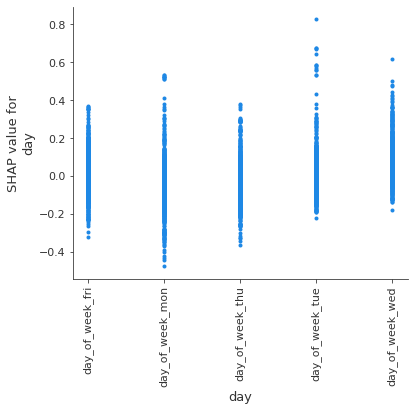

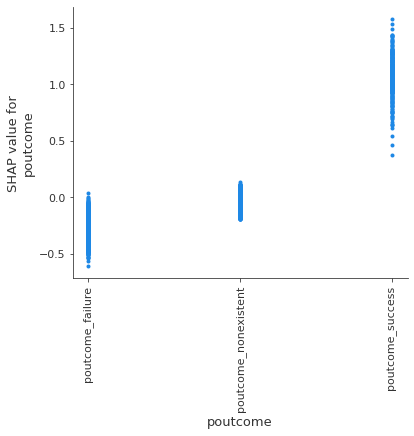

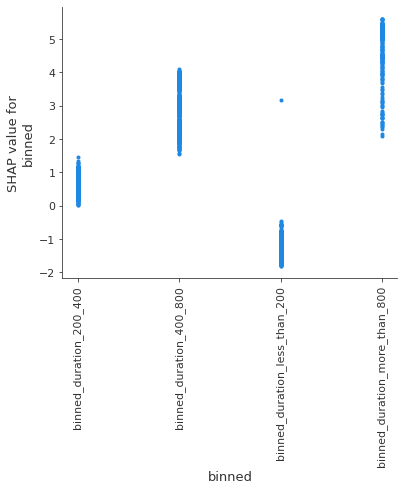

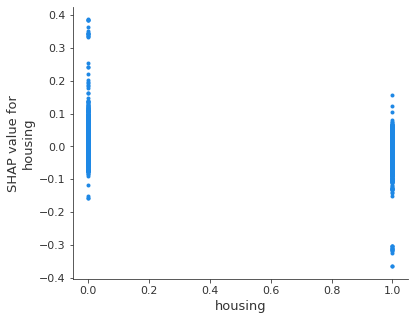

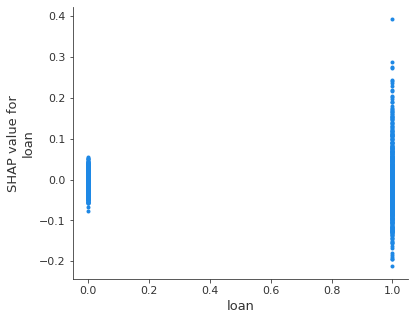

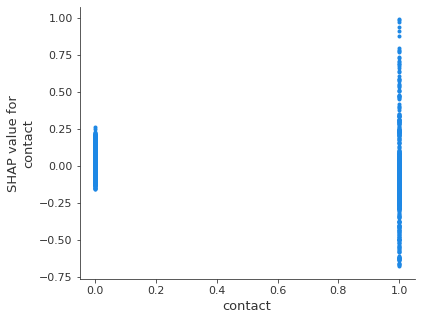

In [464]:
for name in feature.columns:
    shap.dependence_plot(name, new_shap_values, feature, display_features=feature, interaction_index = None)

### SHAP Interaction Plots

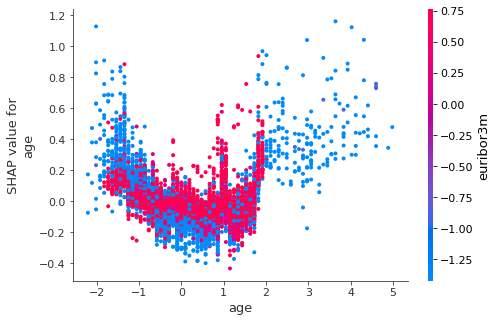

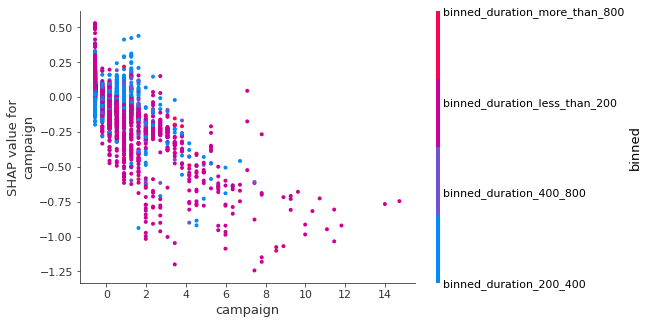

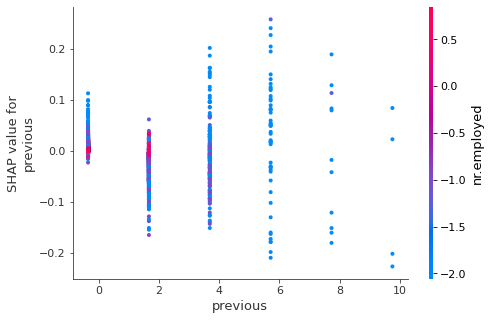

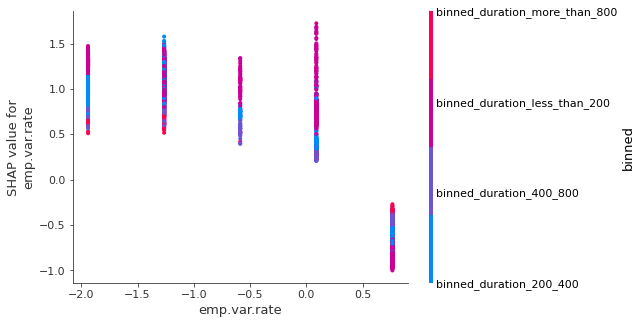

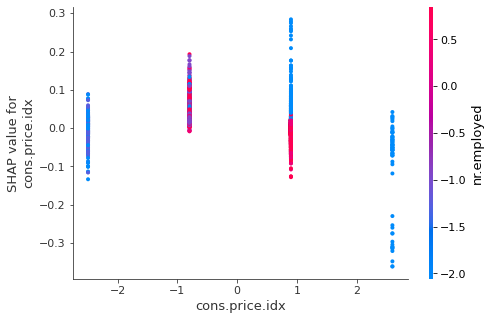

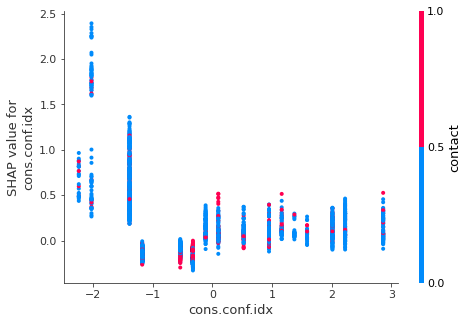

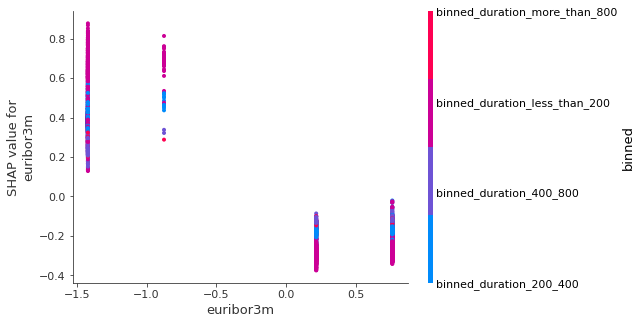

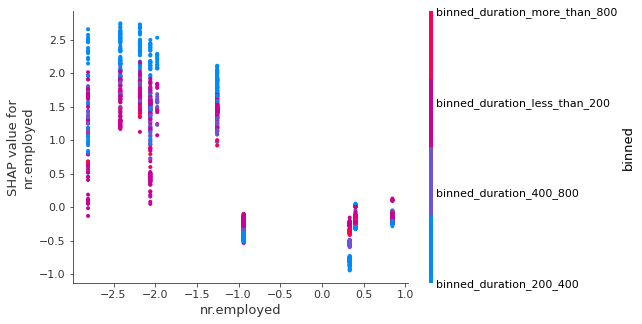

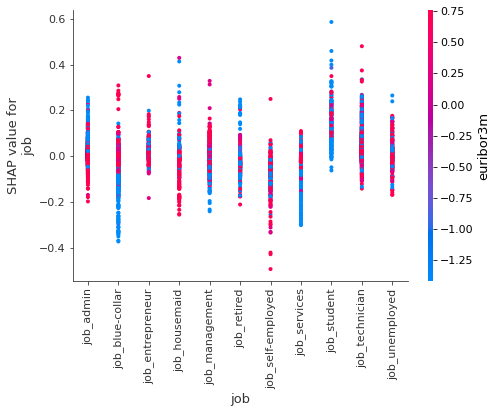

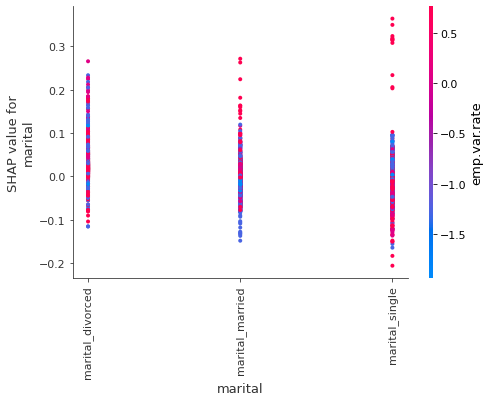

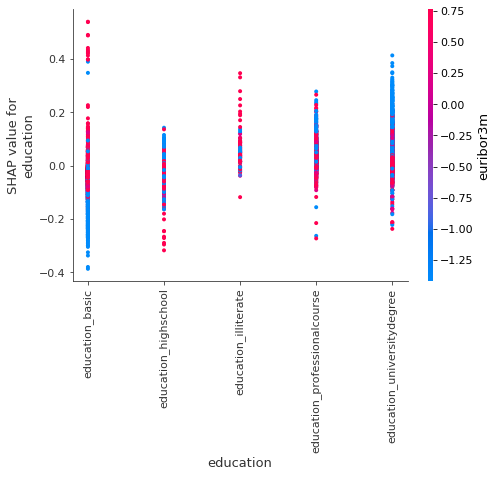

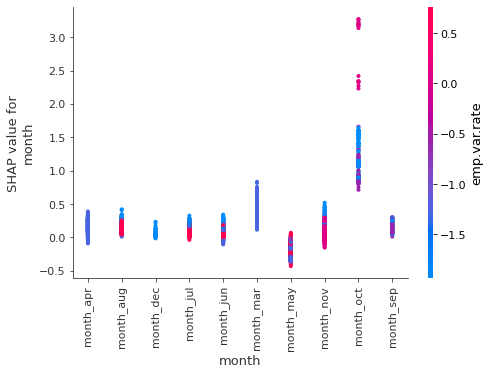

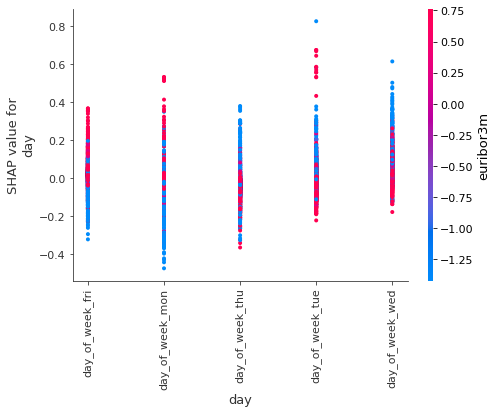

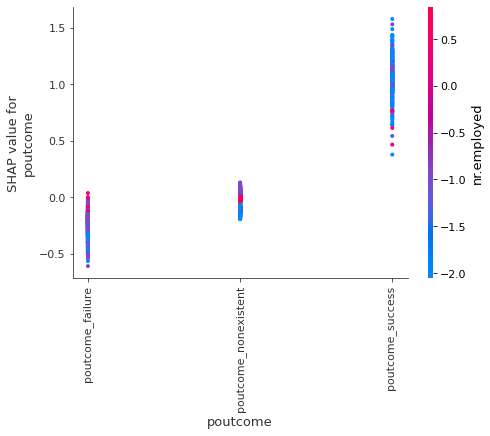

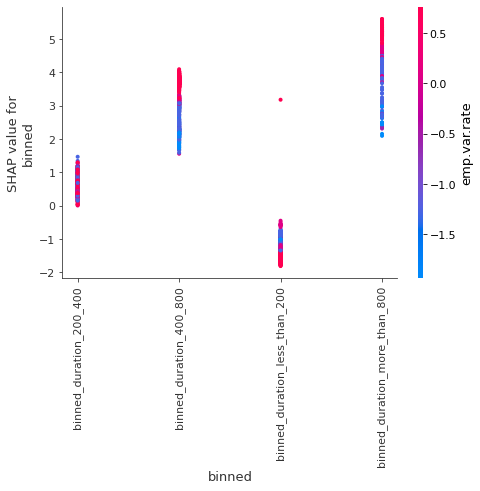

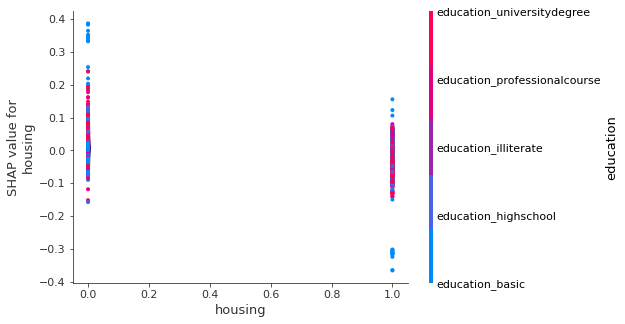

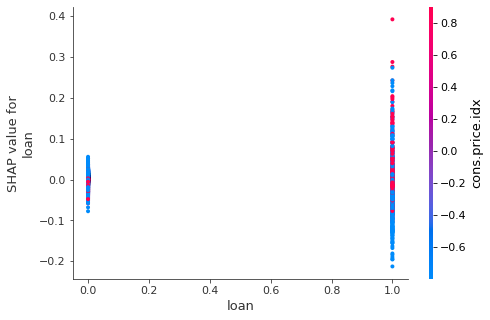

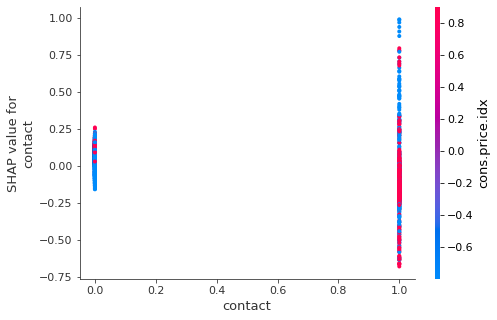

In [465]:
for name in feature.columns:
    shap.dependence_plot(name, new_shap_values, feature, display_features=feature)

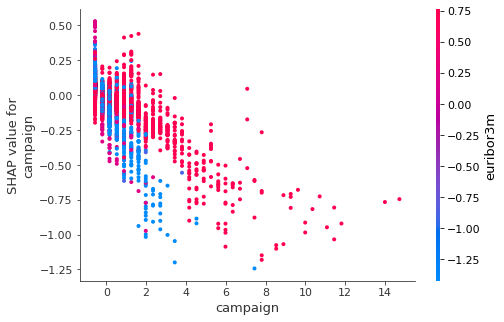

In [466]:
shap.dependence_plot('campaign', new_shap_values, feature, display_features=feature, interaction_index='euribor3m')

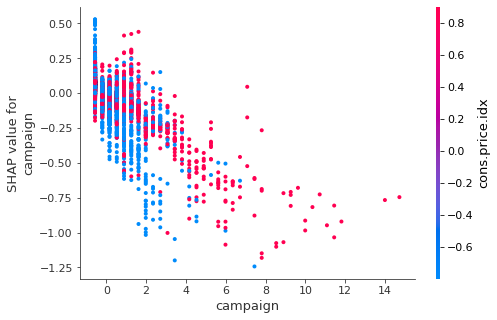

In [467]:
shap.dependence_plot('campaign', new_shap_values, feature, display_features=feature, interaction_index='cons.price.idx')

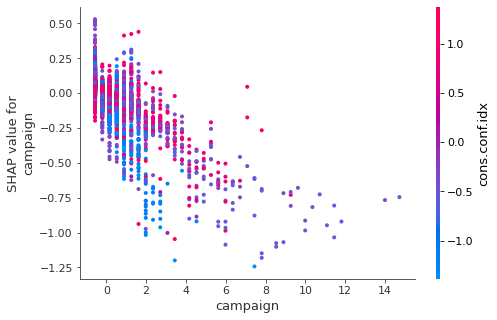

In [468]:
shap.dependence_plot('campaign', new_shap_values, feature, display_features=feature, interaction_index='cons.conf.idx')

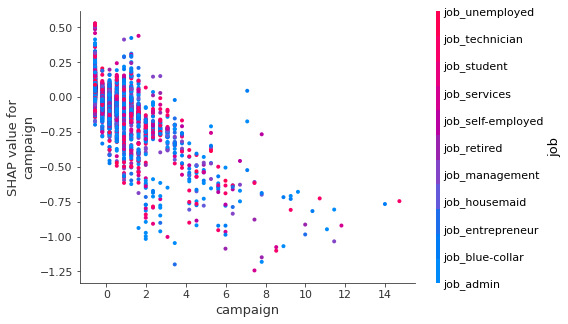

In [469]:
shap.dependence_plot('campaign', new_shap_values, feature, display_features=feature, interaction_index='job')

# SVR

In [67]:
# use Kernel SHAP to explain test set predictions
explainer2 = shap.KernelExplainer(svr.predict_proba, shap.sample(x_train, 2), link="logit")
shap_values = explainer2.shap_values(x_test, nsamples=2)
# plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], x_test.iloc[0,:], link="logit")

In [5]:
svr.predict

<bound method BaseSVC.predict of SVC(C=2, degree=6, max_iter=4623, probability=True)>

In [71]:
x_test_bar = shap.sample(x_test, 10)

In [69]:
svm_explainer = shap.KernelExplainer(svr.predict_proba, x_test_bar)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [72]:
svm_shap_values = svm_explainer.shap_values(x_test_bar, nsamples=1)

In [ ]:
shap.force_plot(svm_explainer.expected_value[0], svm_shap_values[0], x_test, link="logit")

In [48]:
shap.force_plot(svm_explainer.expected_value[1], svm_shap_values[1], x_test_bar)

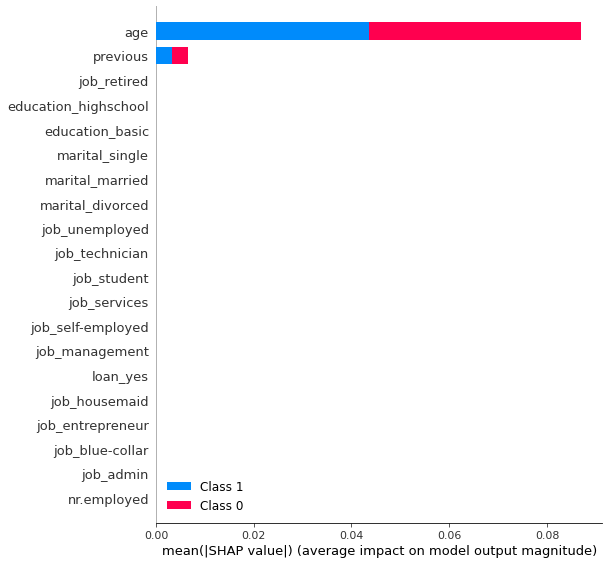

In [53]:
shap.summary_plot(svm_shap_values, x_test_bar)

In [56]:
try:
    import cPickle as pickle
except BaseException:
    import pickle


file_path0 = '../results/Methods/SVR/svm_shap_values.pkl'

with open(file_path0, "wb") as f:
    pickle.dump(svm_shap_values, f)

In [63]:
file_path1 = '../results/Methods/SVR/x_test_bar.pkl'

with open(file_path1, "wb") as f:
    pickle.dump(x_test_bar, f)

In [76]:
file_path0 = '../results/Methods/SVR/svm_shap_values.pkl'

with open(file_path0, 'rb') as f:
     svm_shap_values2 = pickle.load(f)

In [77]:
with open(file_path1, 'rb') as f:
     x_test_bar2 = pickle.load(f)

In [78]:
x_test_bar2.shape

(10, 52)

In [67]:
svm_explainer2 = shap.KernelExplainer(svr.decision_function, x_test_bar)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [68]:
shap.force_plot(svm_explainer2.expected_value[0], svm_shap_values2[0], x_test, link="logit")

TypeError: 'float' object is not subscriptable